In [1]:
using HDF5

include("..\\LiPoSID.jl")

Main.LiPoSID

In [2]:
function read_timeevolution(file_name, state, γ)
    h5open(file_name, "r") do file
        ρᵧ = read(file[state][string(γ)])
        t = ρᵧ["t"]
        ρ₀₀ = ρᵧ["p0"]; Re_ρ₀₁ = ρᵧ["s_re"];  Im_ρ₀₁ = ρᵧ["s_im"]
        ρ_series = []
        t_series = []

        for i in 1:length(t)
            ρᵢ= [ ρ₀₀[i]                      Re_ρ₀₁[i] + im * Im_ρ₀₁[i]
                  Re_ρ₀₁[i] - im * Im_ρ₀₁[i]  1 - ρ₀₀[i]                 ]
            push!(ρ_series, convert(Matrix{ComplexF64}, ρᵢ))
            push!(t_series, convert(Float64, t[i]))
        end
        return(t_series, ρ_series)
    end
end

read_timeevolution (generic function with 1 method)

In [47]:
γ = [ "0.079477",  "0.25133", "0.79477", "2.5133", "7.9477", "25.133", "79.477", "251.33"]

t, ρ  = read_timeevolution("../DATA/ALL_GAMMAS_B4_D10.h5", "B1", γ[1])

(Any[0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24  …  24.98, 25.0, 25.02, 25.04, 25.06, 25.08, 25.1, 25.12, 25.14, 25.16], Any[ComplexF64[0.998781894669 + 0.0im 0.0 + 0.0im; 0.0 - 0.0im 0.0012181053309999745 + 0.0im], ComplexF64[0.998740242862 + 0.0im 0.0 - 0.0im; 0.0 + 0.0im 0.0012597571379999728 + 0.0im], ComplexF64[0.998811275147 + 0.0im -0.0 - 0.0im; 0.0 + 0.0im 0.0011887248530000338 + 0.0im], ComplexF64[0.998940122358 + 0.0im -0.0 - 0.0im; 0.0 + 0.0im 0.0010598776419999956 + 0.0im], ComplexF64[0.999078872069 + 0.0im -0.0 - 0.0im; 0.0 + 0.0im 0.0009211279309999654 + 0.0im], ComplexF64[0.999191390871 + 0.0im 0.0 + 0.0im; -0.0 - 0.0im 0.0008086091290000486 + 0.0im], ComplexF64[0.999256841824 + 0.0im 0.0 + 0.0im; -0.0 - 0.0im 0.0007431581760000139 + 0.0im], ComplexF64[0.999269139962 + 0.0im 0.0 + 0.0im; -0.0 - 0.0im 0.0007308600380000474 + 0.0im], ComplexF64[0.999235481415 + 0.0im 0.0 + 0.0im; 0.0 - 0.0im 0.0007645185850000402 + 0.0im], ComplexF64[0.999171644394 + 0.0im 0.

In [5]:
b = LiPoSID.bloch(ρ)

3×2646 Matrix{Float64}:
 0.0  0.0      0.0       0.0       …  -3.53e-9    -3.498e-9   -3.464e-9
 0.0  0.0      0.0       0.0          -2.7044e-8  -2.6374e-8  -2.5838e-8
 1.0  0.99996  0.999839  0.999639      0.607869    0.607866    0.607863

In [6]:
using Plots

In [7]:
size(b)

(3, 2646)

In [198]:
function plot_bloch_components(γ, n)

    ten_dodeca_states = ["D"*string(i) for i=1:10];
    basis_states = ["B"*string(i) for i=1:4];
    states = [basis_states; ten_dodeca_states]

    data_file = "../DATA/ALL_GAMMAS_B4_D10.h5"

    t, ρ  = read_timeevolution(data_file, states[1], γ)
    b = LiPoSID.bloch(ρ)
    plt = plot(b[n, :], label=false, xlabel="Time steps", ylabel="Bloch component #"*string(n))

    b_ends = []
    push!(b_ends, b[end])

    for state in states[2:end]
        t, ρ  = read_timeevolution(data_file, state, γ)
        b = LiPoSID.bloch(ρ)
        push!(b_ends, b[n, end])
        plt = plot!(b[n, :], label=false)
    end

    b_min = minimum(abs.(b_ends))
    b_max = maximum(abs.(b_ends))

    plt = hline!([b_min, b_max], linestyle=:dash, color=:black, label=false)
    #plt = hline!([b_max], linestyle=:dash, color=:black, label=false)

    plt = annotate!(round(length(ρ)/2), (b_min + b_max)/2, text(string(b_max)*" \n"*string(b_min))) 

    return plt
end



function bloch_ends(γ, n)

    ten_dodeca_states = ["D"*string(i) for i=1:10];
    basis_states = ["B"*string(i) for i=1:4];
    states = [basis_states; ten_dodeca_states]

    data_file = "../DATA/ALL_GAMMAS_B4_D10.h5"

    t, ρ  = read_timeevolution(data_file, states[1], γ)
    b = LiPoSID.bloch(ρ)
    plt = plot(b[n, :], label=false, xlabel="Time steps", ylabel="Bloch component #"*string(n))

    b_ends = []
    push!(b_ends, b[n, end])

    for state in states[2:end]
        t, ρ  = read_timeevolution(data_file, state, γ)
        b = LiPoSID.bloch(ρ)
        push!(b_ends, b[end])
        plt = plot!(b[n, :], label=false)
    end

    b_max = maximum(abs.(b_ends))
    b_min = minimum(abs.(b_ends))

    return b_min, b_max
end

bloch_ends (generic function with 1 method)

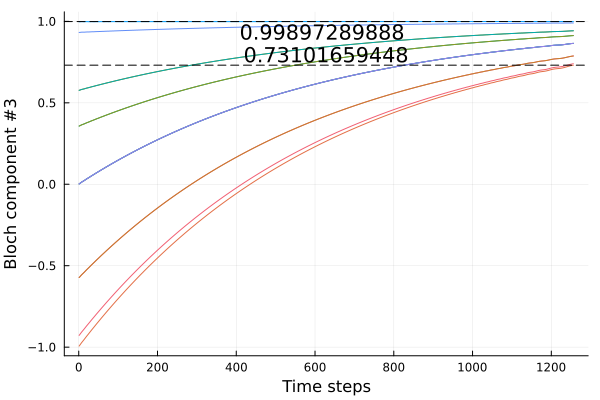

In [199]:
plt = plot_bloch_components(γ[1], 3)
display(plt)

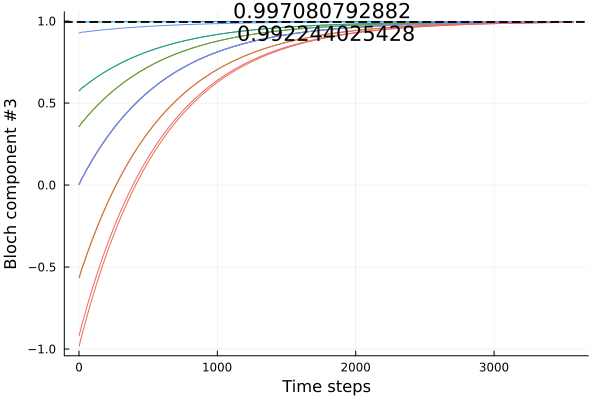

In [200]:
plt = plot_bloch_components(γ[2], 3)
display(plt)

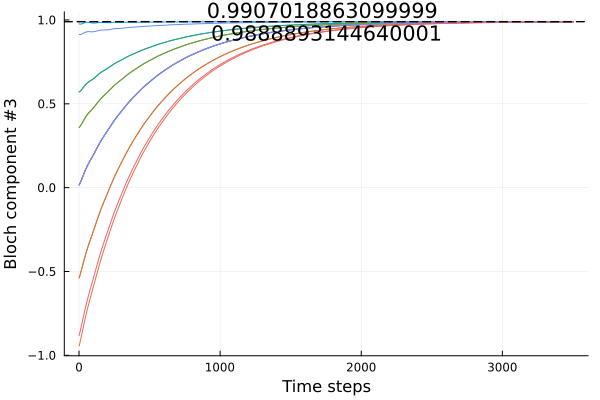

In [201]:
plt = plot_bloch_components(γ[3], 3)
display(plt)

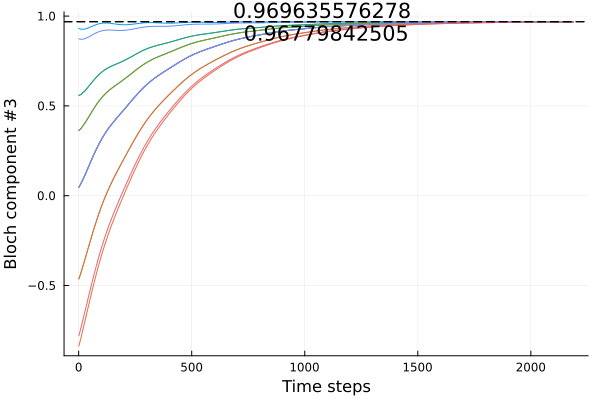

In [202]:
plt = plot_bloch_components(γ[4], 3)
display(plt)

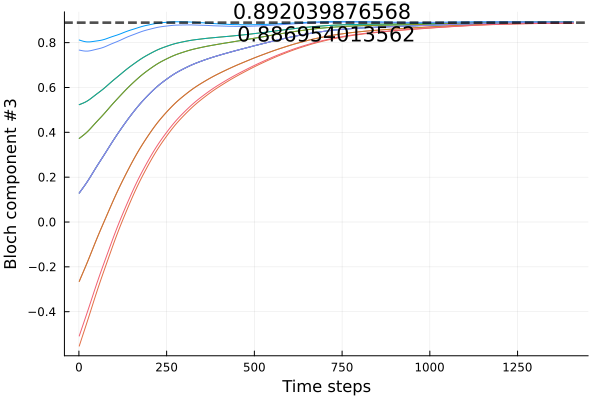

In [203]:
plt = plot_bloch_components(γ[5], 3)
display(plt)

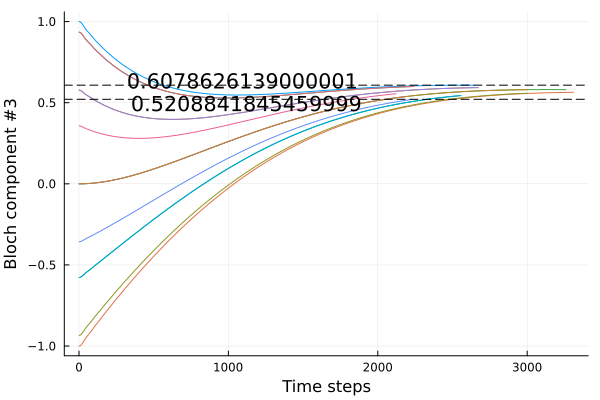

In [204]:
plt = plot_bloch_components(γ[6], 3)
display(plt)

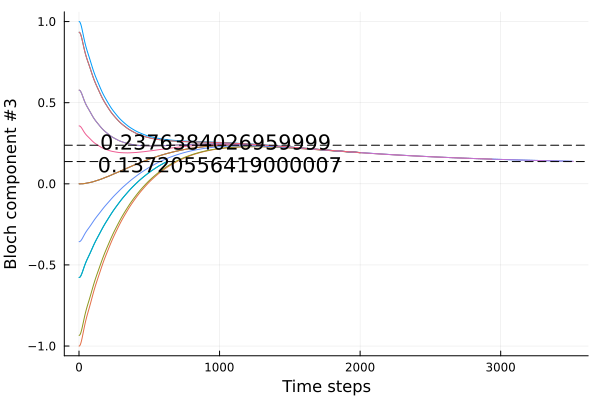

In [205]:
plt = plot_bloch_components(γ[7], 3)
display(plt)

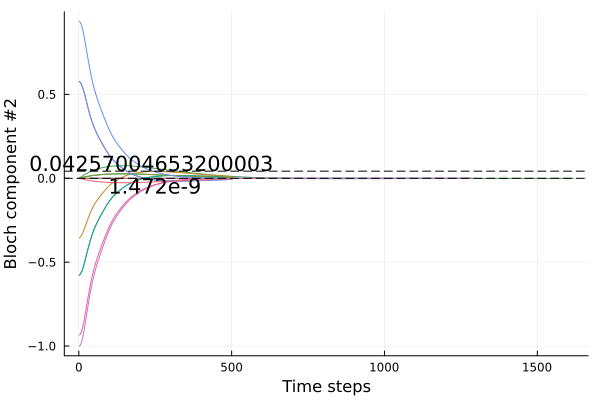

In [206]:
plt = plot_bloch_components(γ[8], 2)
display(plt)

In [207]:
function plot_bloch_ends(n)

    b_maxs = []
    b_mins = []
    for γᵢ in γ
        b_min, b_max =bloch_ends(γᵢ, n)
        push!(b_maxs, b_max) 
        push!(b_mins, b_min) 
    end

    plt = plot(b_mins, label=false,  ylim=(0,1.1), marker=:+) #seriestype=:scatter,
    plt = plot!(b_maxs, label=false,  ylim=(0,1.1), marker=:+) #seriestype=:scatter,
    plt = title!("Final state of the evolution")
    plt = ylabel!("Bloch component #"*string(n))
    plt = xticks!(1:8, γ)

    return plt

end


plot_bloch_ends (generic function with 1 method)

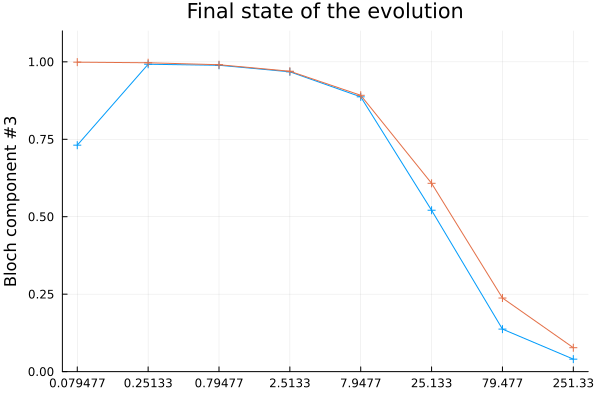

In [208]:
plt = plot_bloch_ends(3)
display(plt)